In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [121]:
df = pd.read_csv("student_scores.csv")

In [122]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [123]:
# Since there is no use of Unnamed Column so we have to drop the table.
df=df.drop("Unnamed: 0",axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [124]:
#Replacing 05-Oct to 5-10 hrs (because 5-10 has been misinterpreted as 05-Oct)

df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


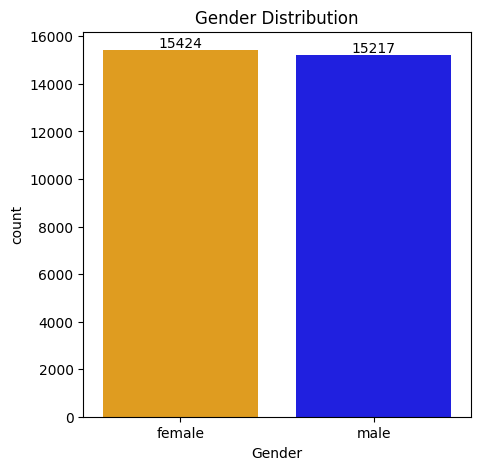

In [125]:
gender_colors = {"male": "blue", "female": "orange"}
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df, x="Gender", hue="Gender", palette=gender_colors )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Gender Distribution")
plt.show()

# From the  chart we have analysed that :
# Number of  females is greater than number of males.

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


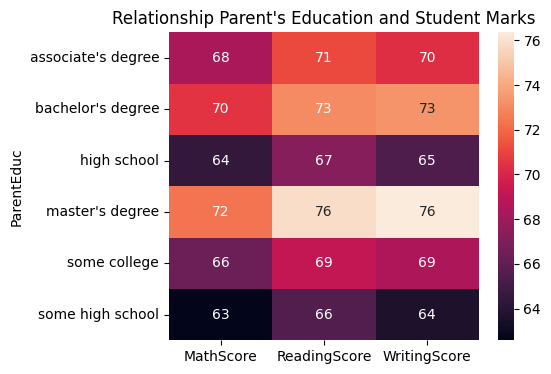

In [126]:
gb1 = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)
plt.figure(figsize=(5,4))
sns.heatmap(gb1 , annot=True)
plt.title("Relationship Parent's Education and Student Marks")
plt.show()

# From the chart below, we have analyzed that parental education has a significant impact on student scores. 
# Students whose parents have a master's degree are the best performers,
# whereas students whose parents have only a high school degree perform the lowest."

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


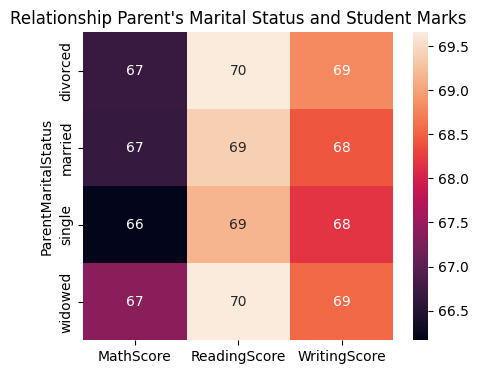

In [127]:
gb2 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb2)
plt.figure(figsize=(5,4))
sns.heatmap(gb2 , annot=True)
plt.title("Relationship Parent's Marital Status and Student Marks")
plt.show()

# From the chart below, we have analyzed that parent's marital status does not have a significant impact on student scores

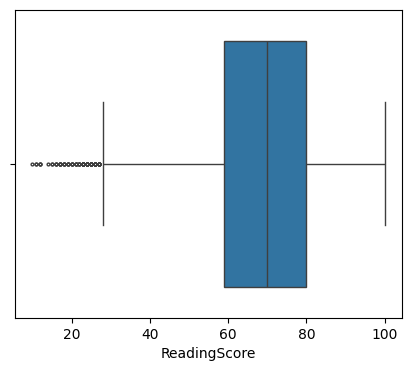

In [128]:
flierprops = dict(marker='o', color='red', markersize=2)
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x="ReadingScore", flierprops=flierprops)
plt.show()

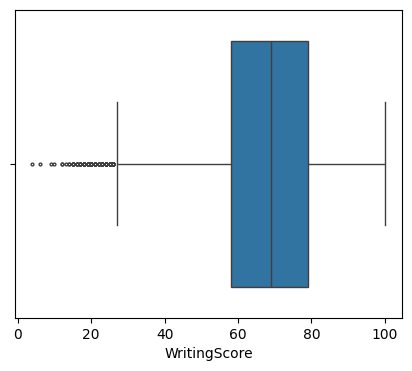

In [129]:
flierprops = dict(marker='o', color='red', markersize=2)
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x="WritingScore", flierprops=flierprops)
plt.show()

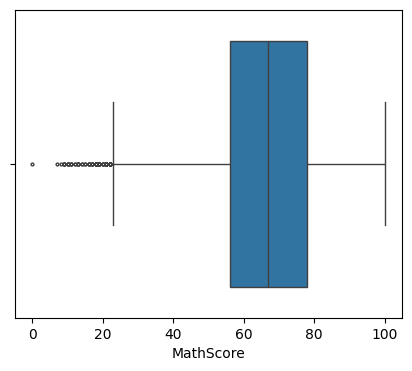

In [130]:
flierprops = dict(marker='o', color='red', markersize=2)
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x="MathScore", flierprops=flierprops)
plt.show()

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5-10            66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


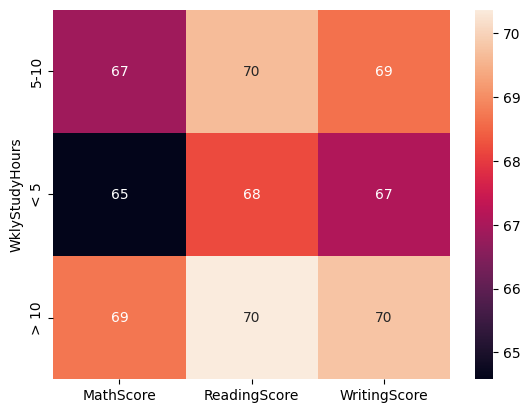

In [133]:
gb3 = df.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb3)
sns.heatmap(gb3,annot=True)
plt.show()

In [134]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


[2219, 5826, 9212, 7503, 4041]


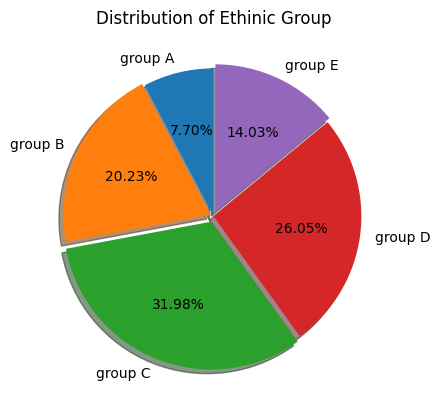

In [160]:
# Distribution Of Ethinic Group

GrpA = df.loc[(df["EthnicGroup"]=="group A")].count()
GrpB = df.loc[(df["EthnicGroup"]=="group B")].count()
GrpC = df.loc[(df["EthnicGroup"]=="group C")].count()
GrpD = df.loc[(df["EthnicGroup"]=="group D")].count()
GrpE = df.loc[(df["EthnicGroup"]=="group E")].count()

listt=['group A','group B','group C','group D','group E']
EthnicGroupList=[GrpA["EthnicGroup"],GrpB["EthnicGroup"],GrpC["EthnicGroup"],GrpD["EthnicGroup"],GrpE["EthnicGroup"]]
ex=[0,0.02,.04,0,0.03]
plt.pie(EthnicGroupList,autopct='%0.2f%%', explode =ex , shadow=True , labels=listt , startangle=90 )
plt.title('Distribution of Ethinic Group')

print(EthnicGroupList)

plt.show()


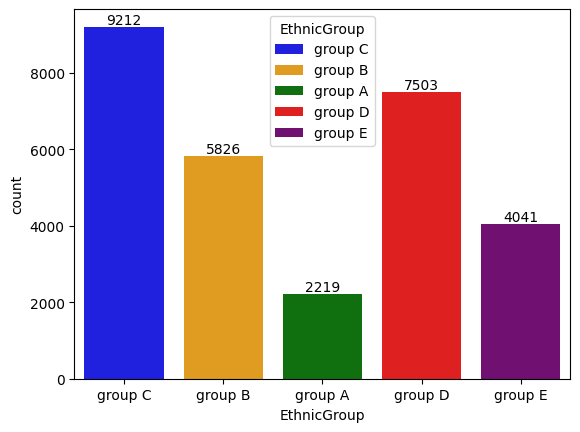

In [158]:
colors = ['blue', 'Orange', 'green', 'red', 'purple']
ax = sns.countplot(data=df, x="EthnicGroup", palette=colors , hue="EthnicGroup")

for container in ax.containers:
    ax.bar_label(container)

plt.show()